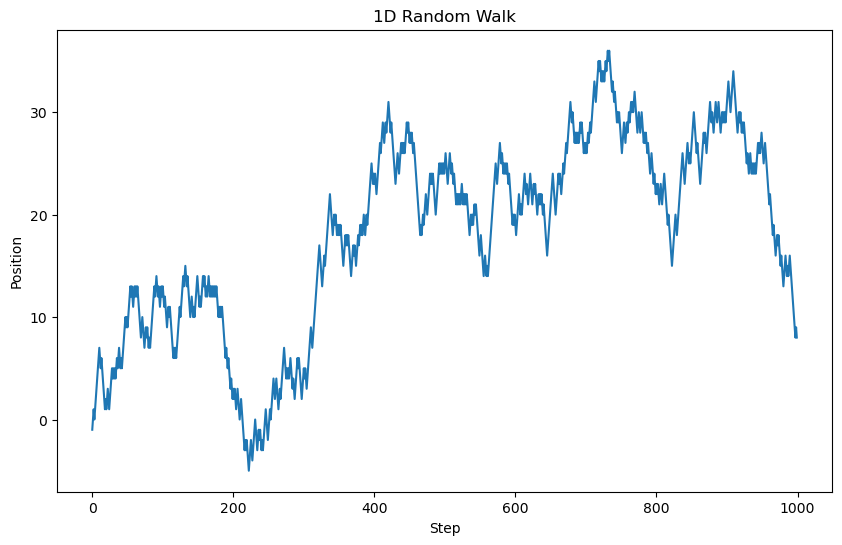

In [122]:
#数学统计模型，描述的是一个随机过程，即一个变量随着时间的变化而随机地移动每一步都有相同的概率向左或向右移动一步。随着时间的推移，粒子的位置是这些随机步数的累积和
import numpy as np
import matplotlib.pyplot as plt

# 设置随机数种子
np.random.seed(0)

# 定义步数
n_steps = 1000

# 生成随机步数：-1 或 1
steps = np.random.choice([-1, 1], size=n_steps)

# 计算位置
position = np.cumsum(steps)

# 绘制随机漫步
plt.figure(figsize=(10, 6))
plt.plot(position)
plt.title('1D Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()


In [123]:
nsteps=1000 
draws=np.random.randint(0,2,size=nsteps)
steps=np.where(draws>0,1,-1)
walk=steps.cumsum()  #累积和，而不是聚类和
walk.min()

-17

In [124]:
walk.max()


30

In [125]:
(np.abs(walk)>=10).argmax() #返回首次遇到的最大值索引  对于布尔类型 ，最大就是True，无论如何都会对数组进行全部扫描

53

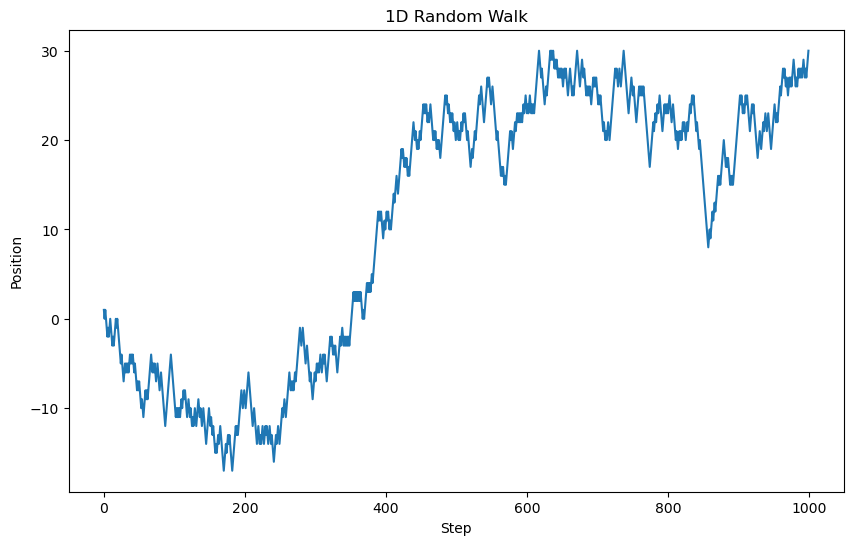

In [126]:
plt.figure(figsize=(10, 6))
plt.plot(walk)
plt.title('1D Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

In [134]:
nwalks=5000
nsteps=1000
draws=np.random.randint(0,2,size=(nsteps,nwalks))#尺度可以定一个nesteps  也可以定一个元组 (nsteps,nwalks)
steps=np.where(draws>0,1,-1)
walks=steps.cumsum(1)#沿着轴1进行累积加
walks


array([[  -1,    0,    1, ...,  -36,  -37,  -38],
       [  -1,   -2,   -1, ...,  -52,  -51,  -52],
       [   1,    2,    1, ...,  -94,  -93,  -94],
       ...,
       [   1,    2,    1, ...,    0,   -1,   -2],
       [  -1,    0,    1, ...,  -34,  -33,  -32],
       [   1,    2,    1, ..., -236, -237, -236]])

In [128]:
walks.max()#调用 .max() 方法时，如果没有指定轴（axis），它会返回数组中的全局最大值。

253

In [129]:
walks.min()


-242

In [137]:
#30或-30的最小穿越时间
hits30=(np.abs(walks)>=30).any(1)  #1表示轴1  是否按轴1 上存在一满足条件的元素  abs能将数组元素都变成绝对值
#如果直接any()  表示数组中是否至少有一个True  而现在any(1)
#表示是否每行至少一个True，一行就是一个过程 有大约1000个过程 是穿越了30步的
hits30

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [138]:
hits30.sum()# 一个True就是一个1  

998

In [143]:
crossing_times=(np.abs(walks)>=30).argmax(1)
crossing_times  #每一行首次，走到30步的步数  argmax针对是整个二维数组的元素  加了1  那就是针对单行里 最大，首次

array([ 989, 4447,  559,  679,  553,  491,  285,  387, 1167,  297, 1055,
       1917,  241,  183,  709,  403,  867,  293,  795,  319, 1885,  777,
        329, 1105, 1375, 1243,  409,  417,  651,  425,  133, 2675,  625,
        649,  643,  329,  121, 2121,  103,  859,  187,  415,  387,  271,
        769, 1221,  571, 2475,  575,  369,  873,  701, 1905, 1293, 1453,
       1901,  105,  239, 1031,  783, 2097, 1357,  597,  357,  333,  165,
       1751, 2813,  561,  189, 3981, 1453, 1015,  969,  903, 1277,  835,
        743,  519,  647,  257,  671,  849,  239,  155,  213, 1055,  177,
       1743,  617,  461,  437,  423,  647, 1307, 1197,  519, 1855,  207,
        603,  947,  513,  925, 1039, 1935, 1587, 1071,  299,  353,  547,
       1131,  421, 1511,  675, 1385, 1131, 2479, 1057, 1491,  687,  291,
        447,  617, 2017, 1033, 1111,  721,  941,  283,  505,  387,  507,
        937,  359,  159, 1331,  951, 3451, 2657,  757,  869,  399,  691,
        923,  265, 1191,  387,  301, 1321,  425, 18

In [144]:
crossing_times.mean()

892.142